In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def quadratic(z, c): 
    """ 
        Initial version w/o affine conjugation
    """
    return z**2 + c

def cubic(z, c): 
    """
        Here the critical points are +-c[0]
    """
    return z**3 - 3*c[0]**2 * z + c[1]

def get_attractor_quad(c, max_iter=1000, escape_radius=2):
    """ 
        Compute any bounded attracting fixed points if they exist
        By Fatou's theorem. Any attracting cycle contains a critical point.
        c is the parameter for f_c(z) = z^2 + c
    """
    z = 0j
    for k in range(max_iter): 
        if abs(z) < escape_radius:
            z = quadratic(z, c)
        else: 
            z = np.inf 
            
    return z

def get_attractor_cubic(c, max_iter=100, escape_radius=1e10):
    
    z1 = 1j * c[0]
    z2 = -1j * c[0]
    
    for _ in range(max_iter):
        if abs(z1) < escape_radius:
            z1 = cubic(z1, c)
        else:
            z1 = np.inf 
            
        if abs(z2) < escape_radius:
            z2 = cubic(z2, c)
        else:
            z2 = np.inf
            
    return z1, z2

def K_quadratic(c, resolution=1000, bounds=2.0, max_iter=64): 
    """
        The filled Julia set K_c for f_c(z) = z^2 + c
    """
    x = np.linspace(-bounds, bounds, resolution)
    y = np.linspace(-bounds, bounds, resolution)
    real, imag = np.meshgrid(x,y)
    grid = real + 1j * imag

    iters = np.zeros(grid.shape, dtype=int) # number of iterations to escape
    active = np.ones(grid.shape, dtype=bool) # remains bounded or not

    for i in range(max_iter): 
        if not np.any(active): 
            break 

        grid[active] = quadratic(grid[active], c)

        escaped = (np.abs(grid) > 2) & active
        iters[escaped] = i
        active[escaped] = False

    iters[active] = max_iter
    
    return iters

def K_cubic(c, resolution=1000, bounds=2.0, max_iter=128):
    R = max(2.0, 3 * np.abs(c[0]**2) + np.abs(c[1]))
    
    x = np.linspace(-bounds, bounds, resolution)
    y = np.linspace(-bounds, bounds, resolution)
    real, imag = np.meshgrid(x, y)
    grid = real + 1j * imag
    
    iters = np.zeros(grid.shape, dtype=int)
    active = np.ones(grid.shape, dtype=bool)
    
    for i in range(max_iter):
        if not np.any(active):
            break
            
        grid[active] = cubic(grid[active], c)
        
        escaped = (np.abs(grid) > R) & active
        iters[escaped] = i
        active[escaped] = False

    iters[active] = max_iter
    
    return iters
    

def compute_basin_cubic(c, p, resolution=1000, bounds=2.0, max_iter=1000, epsilon=1e-2):
    x = np.linspace(-bounds, bounds, resolution)
    y = np.linspace(-bounds, bounds, resolution)
    real, imag = np.meshgrid(x, y)
    grid = real + 1j * imag

    basin = np.zeros(grid.shape, dtype=int) # number of iterations to converge
    active = np.ones(grid.shape, dtype=bool) # has converged or not; has diverged or not; continue iterating only if active

    for i in range(max_iter): 
        if not np.any(active): 
            break 
        
        grid[active] = cubic(grid[active], c) # iterate active orbits

        diff = np.abs(grid - p)
        trapped = (diff < epsilon) & active

        basin[trapped] = i + 1
        active[trapped] = False

        escaped = (np.abs(grid) > 4.0) & active
        active[escaped] = False

    return basin 

def plot_K(filled_julia, c, bounds=2.0): 
    plt.figure(figsize=(10,10))
    plt.title(f'Filled Julia Set for c={c}')
    img = plt.imshow(filled_julia, extent=[-bounds, bounds, -bounds, bounds], origin='lower', cmap='viridis')

    plt.show()
    
def plot_basin_cubic(basin, attractor, bounds=2.0): 
    plt.figure(figsize=(10,10))
    plt.title(f'Attracting Basin for p={attractor}')
    img = plt.imshow(basin, extent=[-bounds, bounds, -bounds, bounds], origin='lower', cmap='inferno')
    plt.plot(attractor.real, attractor.imag, 'g+', markersize=10)

    cbar = plt.colorbar(img, fraction=0.046, pad=0.04)
    cbar.set_label('Interations to Convergence', rotation=270, labelpad=20)

    plt.show()

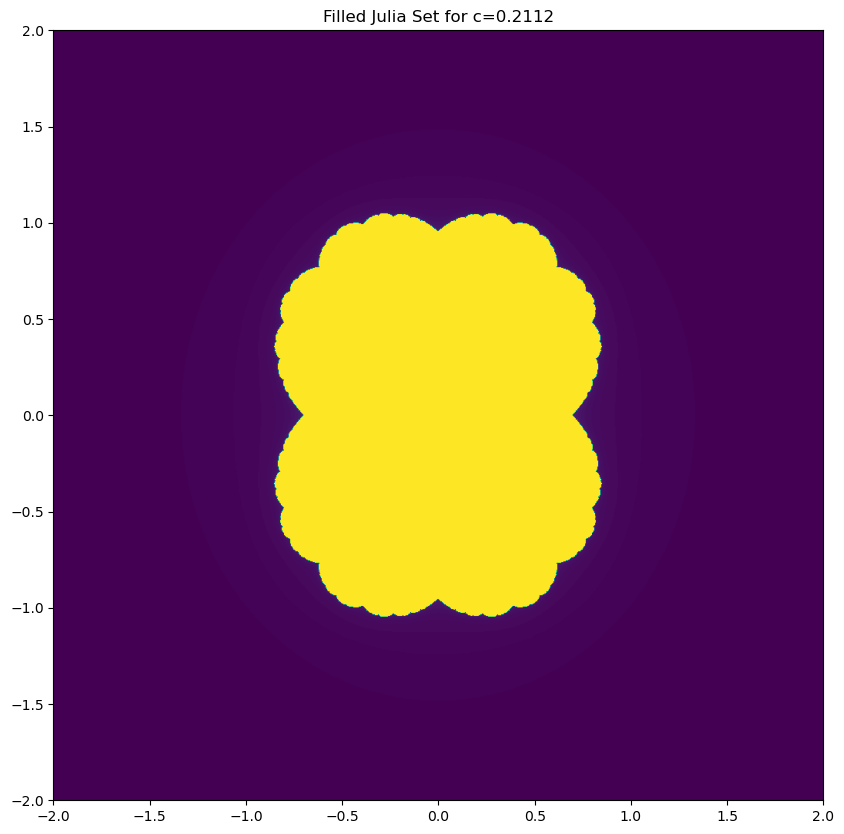

In [65]:
c = 0.2112
fj = K_quadratic(c, max_iter = 128)
plot_K(fj, c)

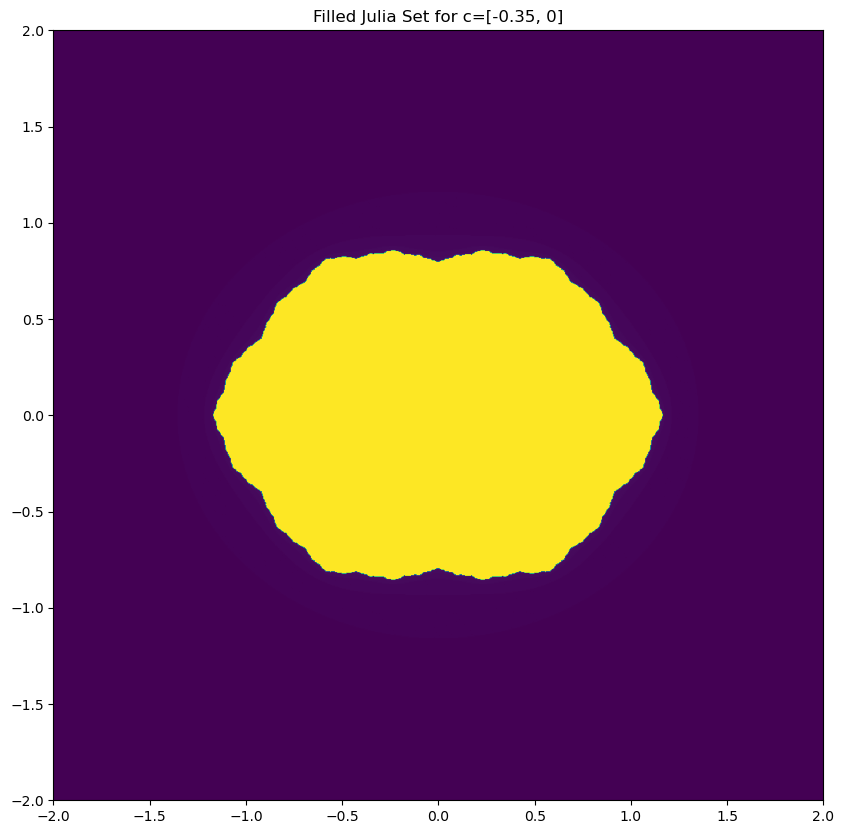

In [60]:
c_cube = [-0.35, 0]
fj_cube = K_cubic(c_cube, max_iter = 128)
plot_K(fj_cube, c_cube)

In [61]:
print(np.unique(fj))
print(np.unique(fj_cube))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  19 128]
[  0   1   2   3   4   5   6   7   8   9  10  11 128]


In [66]:
c_param = [-0.3248+0.32j, 0]
print(get_attractor_cubic(c_param))
p_attractor_1 = get_attractor_cubic(c_param)[0]
basin_data_1 = compute_basin_cubic(c_param, p_attractor_1)

p_attractor_2 = get_attractor_cubic(c_param)[-1]
basin_data_2 = compute_basin_cubic(c_param, p_attractor_2)

((9.821774073566712e-22-1.1594362853064993e-21j), (-9.821774073566712e-22+1.1594362853064993e-21j))


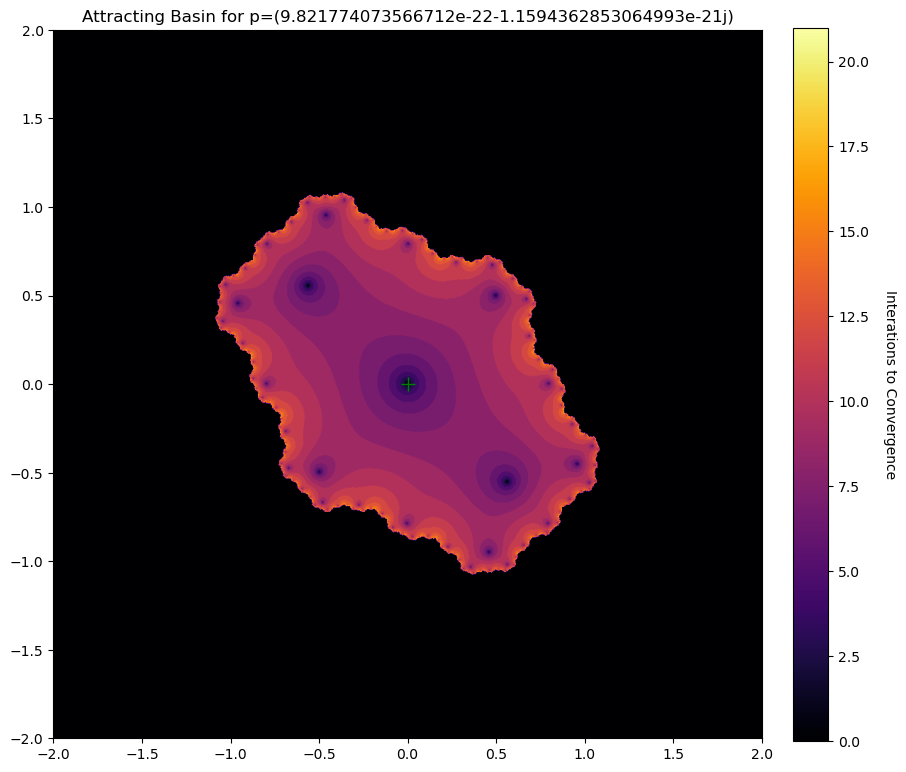

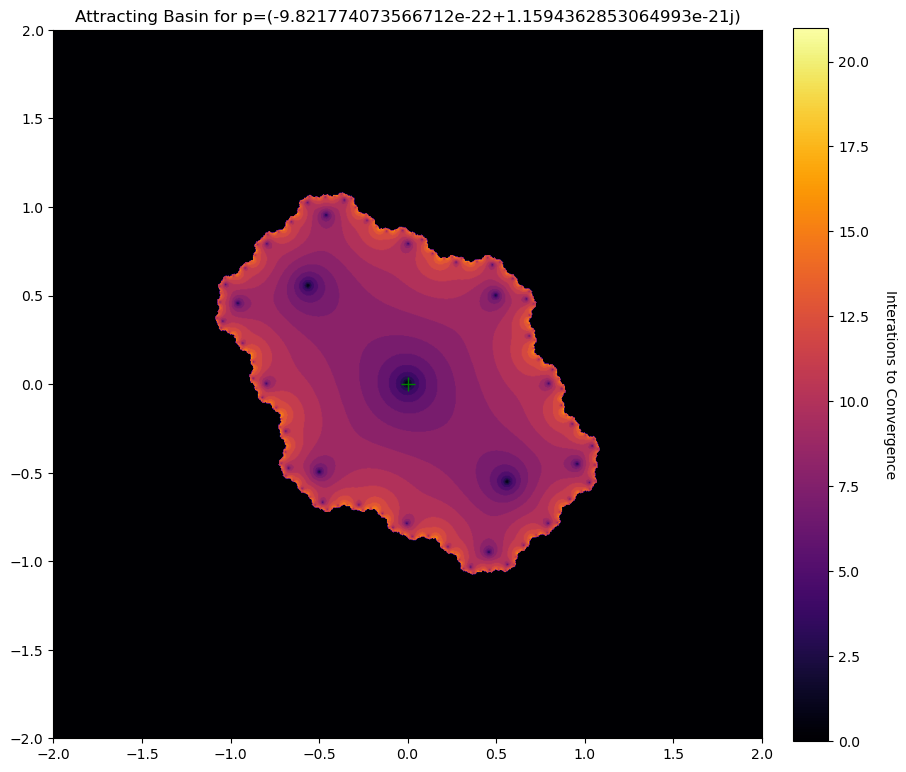

In [67]:
plot_basin_cubic(basin_data_1, p_attractor_1)
plot_basin_cubic(basin_data_2, p_attractor_2)